## <b>Crop Production data<b>

### importing the libraries


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### importing the crop production dataset

In [31]:
data=pd.read_csv("Crop Production data.csv")

### visualizing the dataset

In [32]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [33]:
data.count()

State_Name       246091
District_Name    246091
Crop_Year        246091
Season           246091
Crop             246091
Area             246091
Production       242361
dtype: int64

In [34]:
data['State_Name'].value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

In [35]:
data.shape

(246091, 7)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [38]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

### Handling missing values

In [39]:
col=data['Production']
col=col.fillna(0, inplace=True)

In [40]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [41]:
data.shape

(246091, 7)

In [42]:
data.duplicated().sum()

0

## Year wise production of crops

In [43]:
crop=data.groupby('Crop_Year')['Production'].sum()

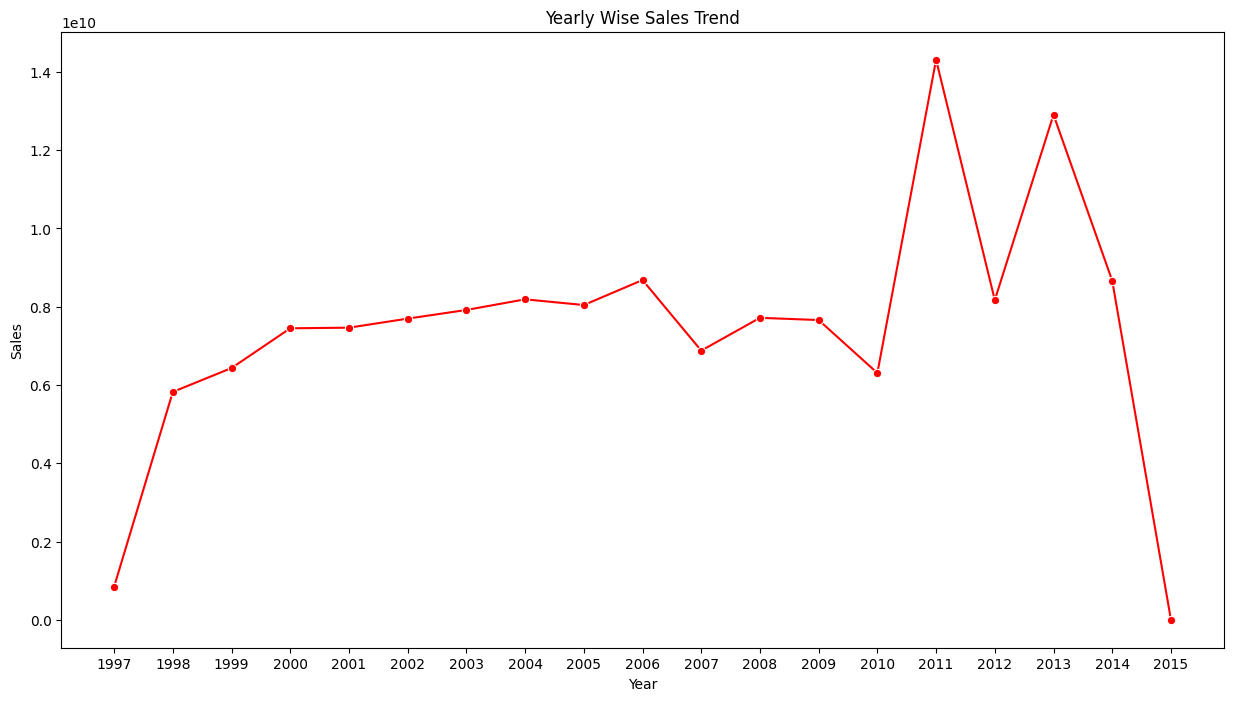

In [44]:
plt.figure(figsize=(15,8))

sns.lineplot(x=crop.index, y=crop.values, color='red',
             marker='o')
plt.title("Yearly Wise Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.xticks(crop.index)
plt.show()

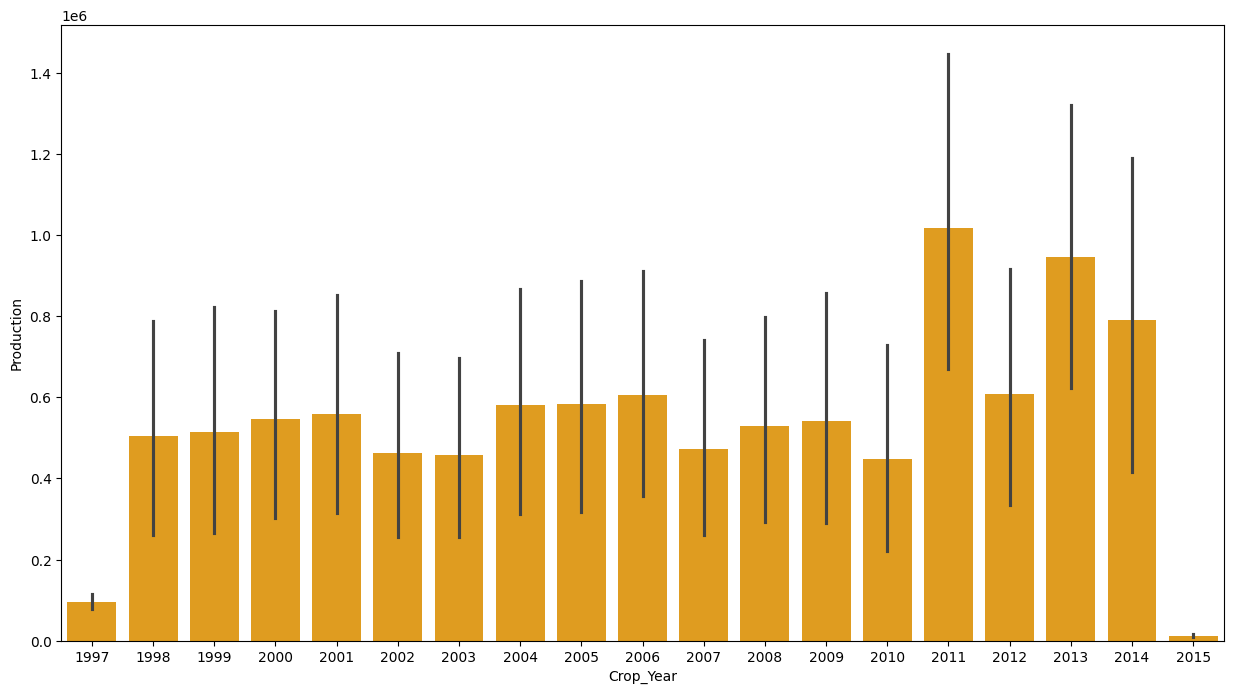

In [45]:
plt.figure(figsize=(15,8))

sns.barplot(x='Crop_Year', y='Production', data=data, color='orange')
plt.legend
plt.show()

*Production rate was very low in the year of 1997.but afterward it increased.

*In the year 2011 there was drastic increase in the Crop Production and it continued till 2014.

*in 2015 there was huge downfall in crop production.

## Season wise production of crop

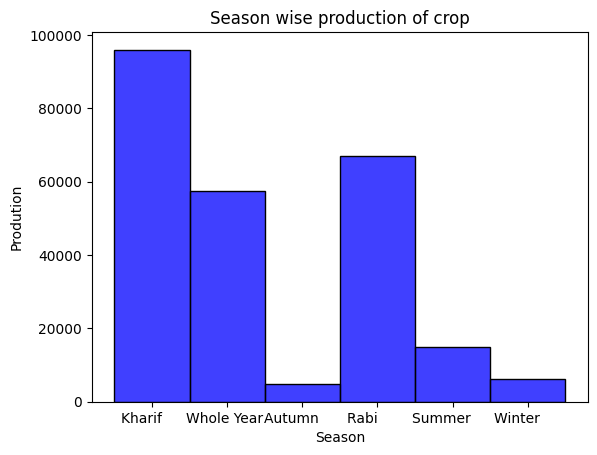

In [46]:
sns.histplot(data['Season'],color='blue')

plt.title('Season wise production of crop')
plt.xlabel('Season')
plt.ylabel('Prodution')
plt.show()

*in Kharif season are drastically high as compare to others And variety of crops in Summer, Winter and autumn are drastically low.


## Distribution of Top 10 States

In [47]:
top_states = data['State_Name'].value_counts().head(10)

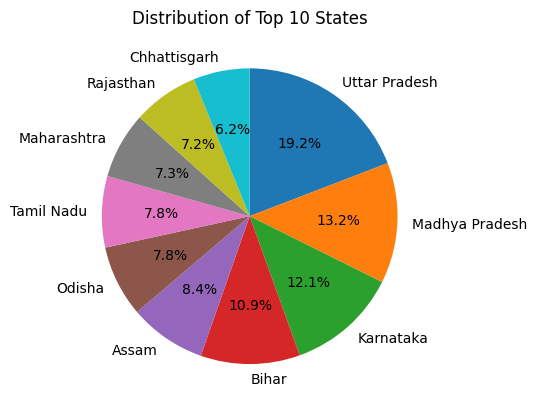

In [48]:
plt.pie(top_states, autopct="%.1f%%", labels=top_states.index, startangle=90, counterclock=False)
plt.title('Distribution of Top 10 States')
plt.show()

*Uttar Pradesh is the most frequently occured state in the dataset, followed by Madhya Pradesh and Karnataka.

### Bottom 10 states

In [49]:
bottom_states =  data['State_Name'].value_counts().tail(5)

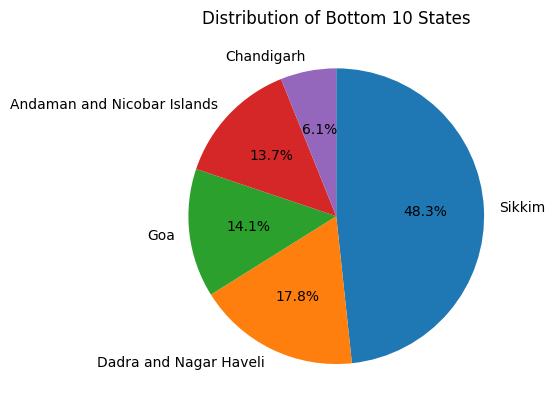

In [50]:
plt.pie(bottom_states, autopct="%.1f%%", labels=bottom_states.index, startangle=90, counterclock=False)
plt.title('Distribution of Bottom 10 States')
plt.show()

*Chandigarh is the lowest frequently occurrenced states, in the dataset, followed by Andaman and Nicobar Islands, and Goa

## State wise production of crops

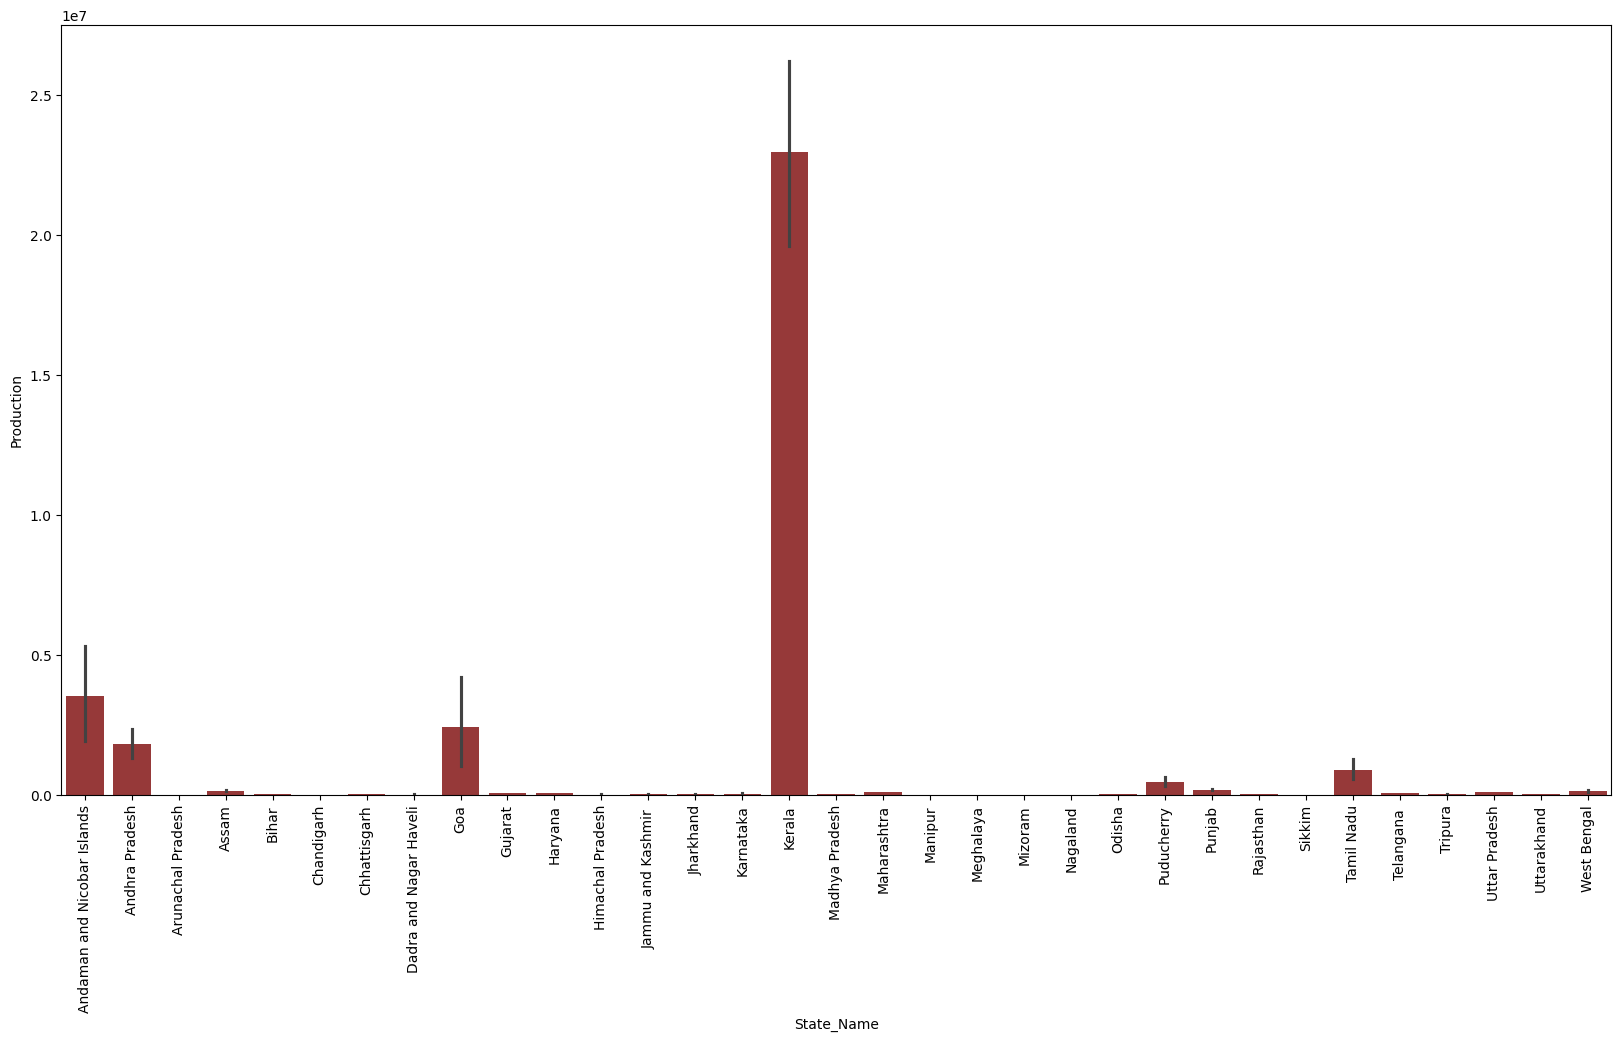

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x='State_Name', y='Production', data=data, color='brown')
plt.xticks(rotation=90)
plt.show()

*Kerala's production rate is drastically high as compare to others.

*most of the North Eastern States Produces very less amount of Crops

## Crops wise production rate

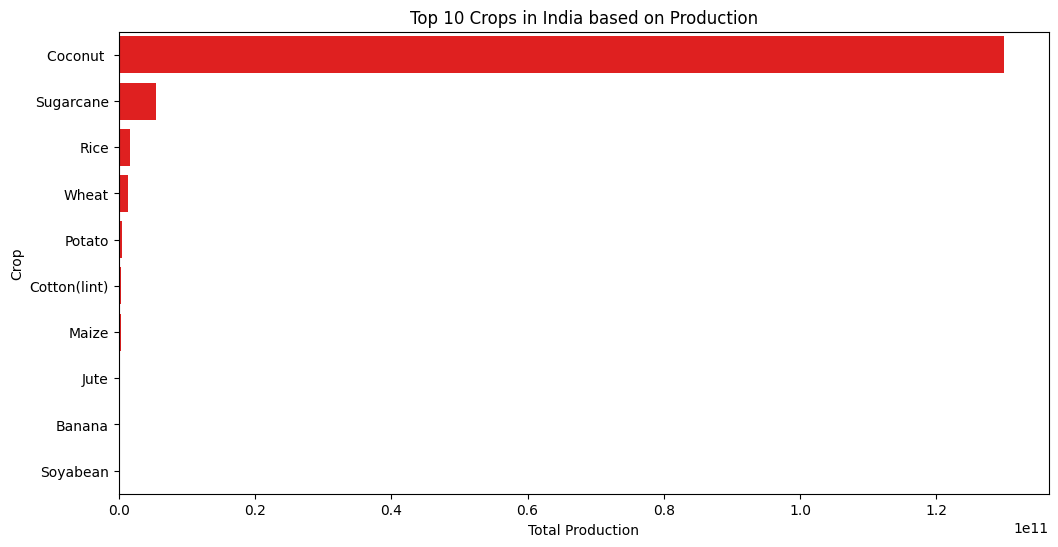

In [52]:
top_crops = data.groupby('Crop')['Production'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Production', y='Crop', data=top_crops, color='red')
plt.title('Top 10 Crops in India based on Production')
plt.xlabel('Total Production')
plt.ylabel('Crop')
plt.show()

*production of coconuts is the the highest value when compared to other crops. we can also see a small value of production of sugarcanes.

## State wise agrricultural land

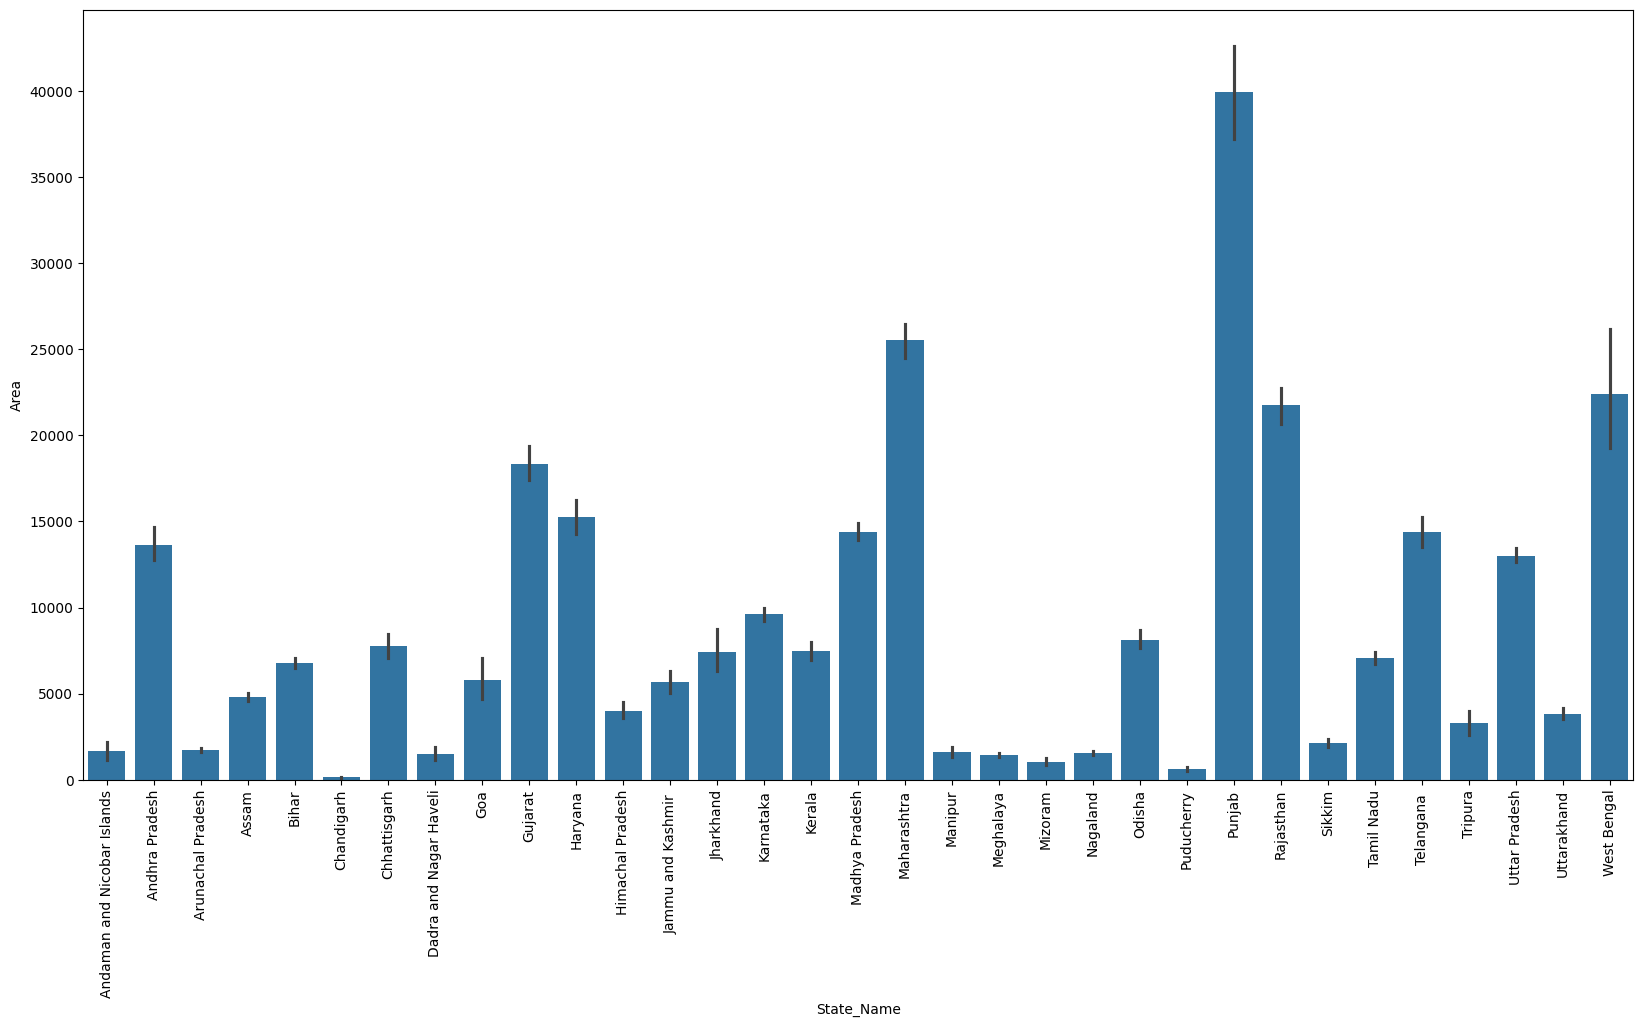

In [53]:
plt.figure(figsize=(20, 10))
sns.barplot(x='State_Name', y='Area', data=data)
plt.xticks(rotation=90)
plt.show()

*Punjab has the largest area for agriculture and maharashtra has the second largest and west bengal has the third largest area for agriculture. We can also infer that chandigarh has the smallest area for agriculture.

## Agricultural areas in different year 


In [60]:
agriculture=data.groupby('Crop_Year')['Area'].sum()

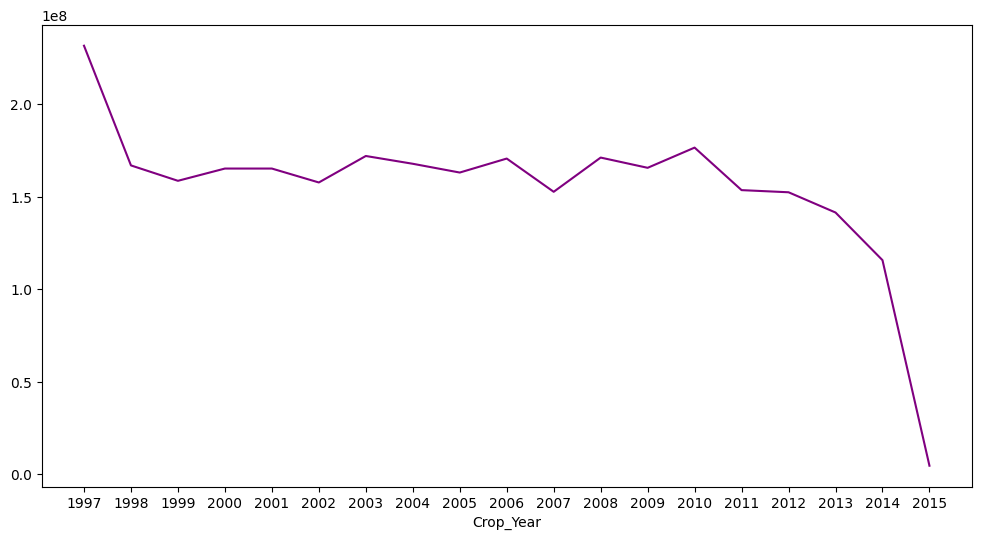

In [67]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=agriculture.index, y=agriculture.values, markers='o', 
            color='purple')
plt.xticks(agriculture.index)
plt.show()

*the agriculture area was the largest during the year 1997 right after that we can see a drastic decline in the agriculture area from the year 2000. We can see further declining of the area from the year 2015.

## Agricultural area in different season

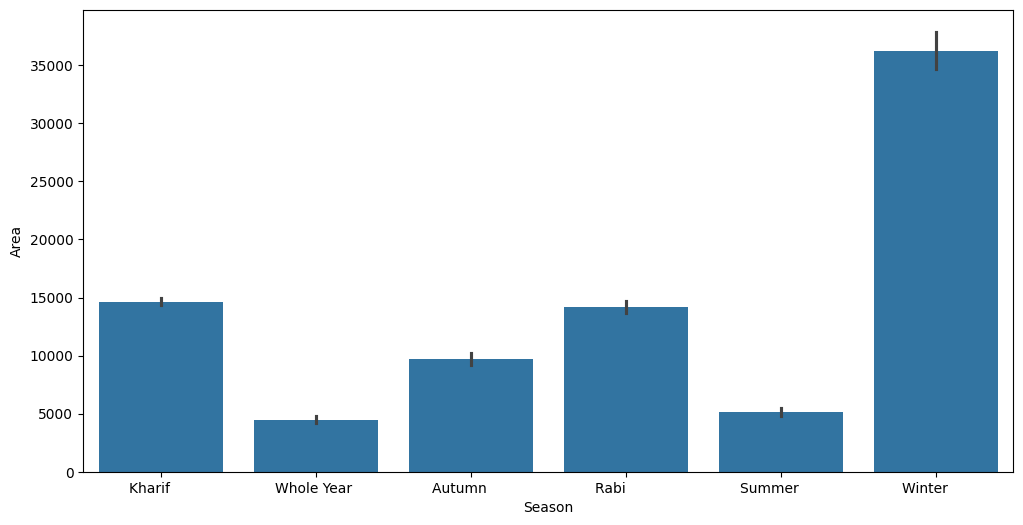

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Area', data=data)
plt.xticks()
plt.show()


*in the winter season the Agriculture area is the largest with value of 35000. We can also infer that during summer season the agriculture area is very less.


## Agricultural area with different Crop year

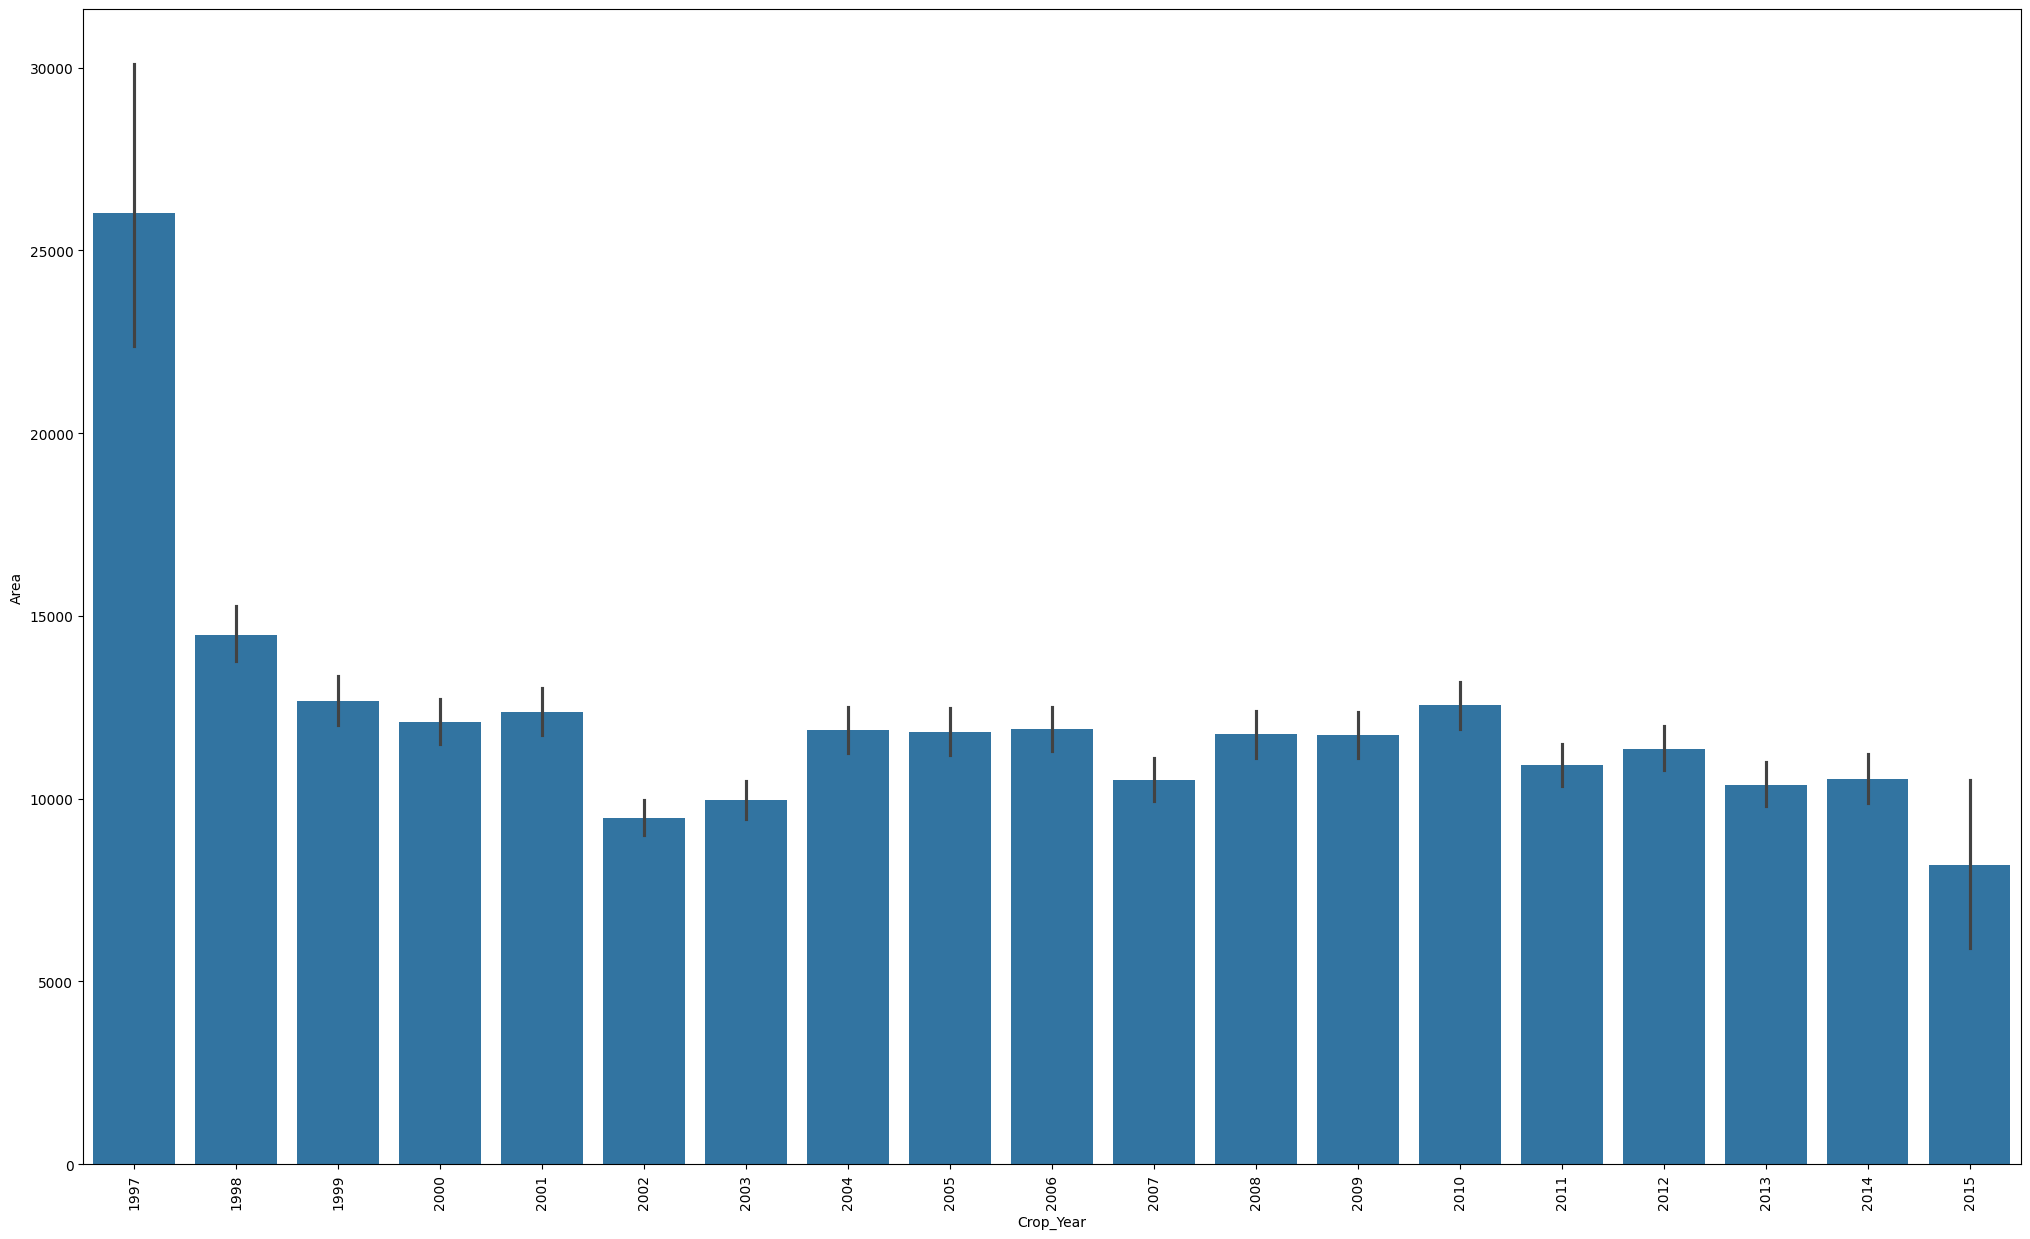

In [56]:
plt.figure(figsize=(25, 15))
sns.barplot(x='Crop_Year', y='Area', data=data)
plt.xticks(rotation=90)
plt.show()

*1997 has the largest agriculture area and it has been declining since then. In the visualization the smallest agriculture area is for the crop year 2015

## CONCLUSION

*Production wise top zone is South zone with Kerala topping it’s high crop production.

*Production wise top crop type are Coconut, Sugarcane and Rice.

*Total Production hit peak in the year 2011 and 2013.and 2015 was worst

*Top crop categories which shows high production values are Whole Year(Annual growing plants),Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monsoons.

*Top crop categories are Cereal, Pulses and Oilseeds

*Top producing state Kerala shows a abundance of whole year seasonal crops and Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summer crops.